In [ ]:
# Table of contents
# 1. About the dataset
# 2. Data Visualization and Analysis
# 3. Classification

In [1]:
# Lets load required libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# Telecom company has segmented its customer base by four groups.
# The example focuses on using demographic data, such as region, age
# and marital, to predict usage patterns.

# The target field, called "custcat", has 4 possible values correspond
# to customer groups as follows: 1-Basic servece, 2-E-service, 3-Plus 
# service, 4-Total service

# Objective is to build a classifier to predict the class of unknown cases.


In [2]:
# LOAD DATA FROM CSV file

df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# Data Visualization and Analysis

# Lets see how many of each class is in our dataset

df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b2eed30>]], dtype=object)

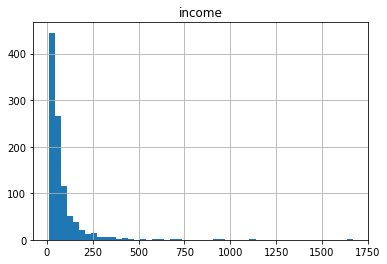

In [5]:
# You can easily explore your data using vizualization techniques:

df.hist(column='income', bins=50)

In [6]:
#  FEATURE SET
# Lets define feature sets, X:

df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
# To use scikit-learn library, we have to CONVERT to Pandas data frame
# to a Numpy Array:

X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values #.astype(float)
X[0:5]


array([[   2.,   13.,   44.,    1.,    9.,   64.,    4.,    5.,    0.,
           0.,    2.],
       [   3.,   11.,   33.,    1.,    7.,  136.,    5.,    5.,    0.,
           0.,    6.],
       [   3.,   68.,   52.,    1.,   24.,  116.,    1.,   29.,    0.,
           1.,    2.],
       [   2.,   33.,   33.,    0.,   12.,   33.,    2.,    0.,    0.,
           1.,    1.],
       [   2.,   23.,   30.,    1.,    9.,   30.,    1.,    2.,    0.,
           0.,    4.]])

In [8]:
# What are our labels?

y = df['custcat'].values
y[0:5]


array([1, 4, 3, 1, 3])

In [9]:
#  NORMALIZE DATA
#Data standarization give data zero mean and unit variance, it is good
#practice, for algorithms such as KNN which is based on distance of cases:

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [10]:
# TRAIN TEST SPLIT 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print ('Train set: ', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)


Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [11]:
#             CLASSIFICATION         

# K-nearest neighbor (KNN)

# import library

#Classifier implementing the K-nearest neighbors vote

from sklearn.neighbors import KNeighborsClassifier

In [12]:
#      TRAINING

# Let's start the algorithm with k=4 for now:

k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [13]:
# PREDICTING

# We can use the model to predict the test set:

yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [14]:
# Accuracy Evaluation

#In multilabel classification, "accuracy classification score" is a 
#function that computes subset accuracy. This function is equal to the
#jaccard_similarity_score function. It calculates how closely the actual
#labels and predicted labels are matched in the test set.

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [17]:
# PRACTICE

# Can you build the model again, but this time with k = 6?

k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,yhat6))


Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [ ]:
# WHAT ABOUT OTHER K?

#We can calculate the accuracy of KNN for different Ks.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
mean_acc


In [ ]:
# PLOT Model Accuracy for Different number of Neighbors

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
